# Causes of Death Analysis

## Table of Contents

## 1. Import Libraries and Data

## 1.1 Variables and Data Types (gdp dataset)

## 2. Data Cleaning and Consistency Check
2.1 Find Missing Values

2.2 Find Duplicates

2.3 Find Mixed-Type Values

## 3. Export gdp dataframe

## 01. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Create a path
path=r'C:\Users\midov\Documents\Studies\Data Analysis\Immersion into Data Analytics\Achievement 6_Advanced Analytics & Dashboard Design\Causes of Death Analysis'

In [3]:
#Import "Global_health_expenditure as % of GDP.csv" file as df_gdp, using path variable
df_gdp=pd.read_csv(os.path.join(path,'Data','Original Data','Global_health_expenditure_GDP.csv'))

In [4]:
#Check the df
df_gdp.info()
df_gdp.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Territory  2191 non-null   object 
 1   Code               2081 non-null   object 
 2   Year               2191 non-null   int64  
 3   Indicator          2191 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.6+ KB


,count,mean,std,min,25%,50%,75%,max
Year,2191.0,2013.991328,3.162194,2009.00,2011.00,2014.00,2017.00,2019.00
Indicator,2191.0,6.443501,2.841533,1.26,4.42,6.01,8.05,28.82


In [5]:
#Check the first 5 rows
df_gdp.head()

,Country/Territory,Code,Year,Indicator
0,Afghanistan,AFG,2009,9.82
1,Afghanistan,AFG,2010,8.57
2,Afghanistan,AFG,2011,8.56
3,Afghanistan,AFG,2012,7.90
4,Afghanistan,AFG,2013,8.81


In [6]:
#Check the number of rows and columns
df_gdp.shape

(2191, 4)

## 1.1 Variables and Data Types (gdp dataset)

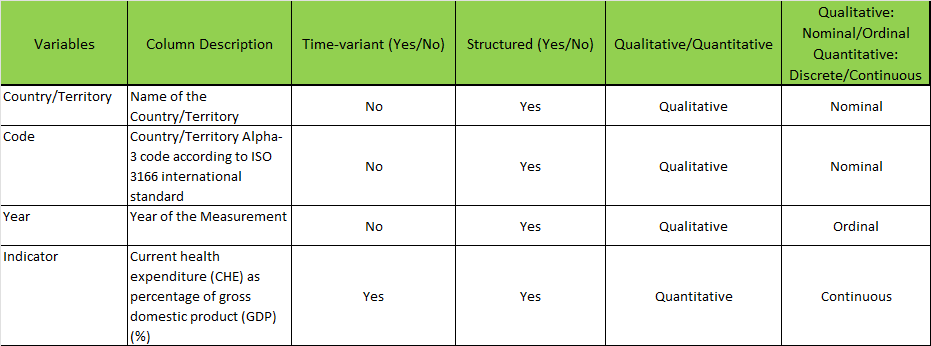

In [7]:
#Check the total number of countries
df_gdp['Country/Territory'].nunique()

202

In [8]:
#Check the total number of year data provided for each country
df_gdp['Country/Territory'].value_counts()

Afghanistan    11
Nauru          11
Netherlands    11
New Zealand    11
Nicaragua      11
               ..
Montenegro      9
Yemen           7
Syria           4
Libya           3
South Sudan     3
Name: Country/Territory, Length: 202, dtype: int64

## 02. Data Cleaning and Consistency Check

In [9]:
#Rename the column 'Country/Territory'
df_gdp.rename(columns = {'Country/Territory' : 'Country'}, inplace = True)

In [10]:
#Replace a long country name 
df_gdp.replace(to_replace='Democratic Republic of Congo',value = 'Congo',inplace=True)

## 2.1 Find Missing Values

In [11]:
#Check for null values
df_gdp.isnull().sum()

Country        0
Code         110
Year           0
Indicator      0
dtype: int64

110 null values in Code variable

In [12]:
df_gdp.dropna(subset = ['Code'], inplace = True)

In [13]:
df_gdp.shape

(2081, 4)

## 2.2 Find Duplicates

In [14]:
#Check for duplicates
df_dups = df_gdp[df_gdp.duplicated()]

In [15]:
df_gdp_no_dups = df_gdp.drop_duplicates()

In [16]:
df_gdp_no_dups.shape

(2081, 4)

No duplicates

## 2.3 Find Mixed-Type Values

In [17]:
#Check for mixed data type
for col in df_gdp.columns.tolist():
  weird = (df_gdp[[col]].applymap(type) != df_gdp[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_gdp[weird]) > 0:
    print (col)

In [18]:
df_gdp.shape

(2081, 4)

## 3. Export gdp dataframe

In [19]:
df_gdp.to_csv(os.path.join(path,'Data','Prepared Data','gdp_cleaned.csv'))